In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [17]:
sp500=yf.download('^GSPC',start="2021-03-09", end="2023-03-01",interval='1h')

[*********************100%***********************]  1 of 1 completed


In [18]:
minmax = MinMaxScaler(feature_range = (0,1) )
sp500['Adj Close'] = minmax.fit_transform(np.array(sp500['Adj Close']).reshape(-1,1))

<Axes: xlabel='Datetime'>

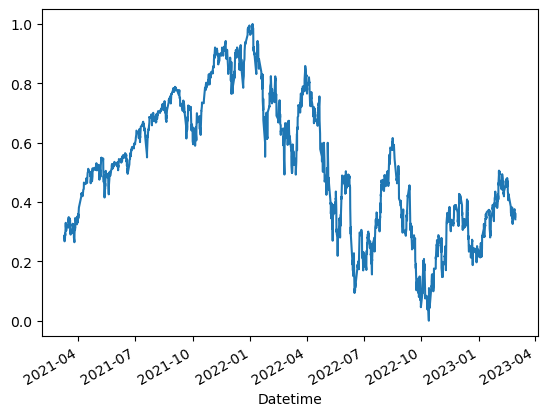

In [19]:
sp500['Adj Close'].plot()

In [20]:
def rnn_set(dt,set):
    x_train=list()
    for x in range(len(dt)-set):
        a=list([c] for c in dt[(x):(x+set)])
        # y_train=[y,y_train]
        x_train.append(a)
    return np.array(x_train)

In [21]:
rnn_set(sp500['Adj Close'],60).shape

(3418, 60, 1)

In [22]:
X_train=rnn_set(sp500['Adj Close'],60)[:3375]
X_train

array([[[0.2778714 ],
        [0.2810688 ],
        [0.2879236 ],
        ...,
        [0.29140164],
        [0.30434681],
        [0.30690469]],

       [[0.2810688 ],
        [0.2879236 ],
        [0.28662114],
        ...,
        [0.30434681],
        [0.30690469],
        [0.30580519]],

       [[0.2879236 ],
        [0.28662114],
        [0.28356424],
        ...,
        [0.30690469],
        [0.30580519],
        [0.30562585]],

       ...,

       [[0.45253155],
        [0.44194892],
        [0.45168926],
        ...,
        [0.41750897],
        [0.40591271],
        [0.41415563]],

       [[0.44194892],
        [0.45168926],
        [0.45195428],
        ...,
        [0.40591271],
        [0.41415563],
        [0.40758947]],

       [[0.45168926],
        [0.45195428],
        [0.45196228],
        ...,
        [0.41415563],
        [0.40758947],
        [0.41856163]]])

In [23]:
X_test=rnn_set(sp500['Adj Close'],60)[3375:]

In [24]:
y_train=np.array(sp500['Adj Close'][60:3375+60])

In [25]:
y_test=np.array(sp500['Adj Close'][3375+60:])

In [26]:
from tensorflow.keras.activations import *

In [27]:
model = Sequential() 
model.add(LSTM(500,return_sequences= True, input_shape=(X_train.shape[1],1))) 
model.add(LSTM(50, return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 500)           1004000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 50)            110200    
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 1,134,451
Trainable params: 1,134,451
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras.utils import plot_model

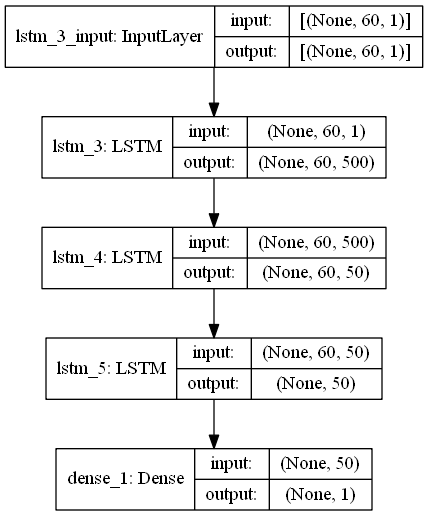

In [29]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [18]:
from  import plot_model

ModuleNotFoundError: No module named 'keras'

In [170]:
model.fit(X_train, y_train, epochs=3000, batch_size=20, verbose=1)

Epoch 1/3000
169/169 [==============================] - 6s 17ms/step - loss: 0.0060
Epoch 2/3000
169/169 [==============================] - 3s 15ms/step - loss: 0.0014
Epoch 3/3000
169/169 [==============================] - 3s 16ms/step - loss: 0.0011
Epoch 4/3000
169/169 [==============================] - 3s 15ms/step - loss: 0.0010
Epoch 5/3000
169/169 [==============================] - 3s 15ms/step - loss: 8.8930e-04
Epoch 6/3000
169/169 [==============================] - 3s 16ms/step - loss: 7.7063e-04
Epoch 7/3000
169/169 [==============================] - 3s 16ms/step - loss: 7.1361e-04
Epoch 8/3000
169/169 [==============================] - 3s 16ms/step - loss: 6.4684e-04
Epoch 9/3000
169/169 [==============================] - 3s 15ms/step - loss: 5.8055e-04
Epoch 10/3000
169/169 [==============================] - 3s 15ms/step - loss: 5.5684e-04
Epoch 11/3000
169/169 [==============================] - 3s 15ms/step - loss: 5.2387e-04
Epoch 12/3000
169/169 [=======================

169/169 [==============================] - 3s 15ms/step - loss: 2.2570e-04
Epoch 185/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.2741e-04
Epoch 186/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.2089e-04
Epoch 187/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.2775e-04
Epoch 188/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.3502e-04
Epoch 189/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.2579e-04
Epoch 190/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.2137e-04
Epoch 191/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.2068e-04
Epoch 192/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.3028e-04
Epoch 193/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.3071e-04
Epoch 194/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.3877e-04
Epoch 195/3000
169/169 [=

169/169 [==============================] - 3s 15ms/step - loss: 2.1955e-04
Epoch 367/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.2073e-04
Epoch 368/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.2137e-04
Epoch 369/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.2416e-04
Epoch 370/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.1922e-04
Epoch 371/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.1581e-04
Epoch 372/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.1978e-04
Epoch 373/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.2153e-04
Epoch 374/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.2305e-04
Epoch 375/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.2450e-04
Epoch 376/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.1636e-04
Epoch 377/3000
169/169 [=

169/169 [==============================] - 3s 16ms/step - loss: 2.1810e-04
Epoch 549/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.1939e-04
Epoch 550/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.2250e-04
Epoch 551/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.1937e-04
Epoch 552/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.2205e-04
Epoch 553/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.3096e-04
Epoch 554/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.3060e-04
Epoch 555/3000
169/169 [==============================] - 3s 16ms/step - loss: 2.1766e-04
Epoch 556/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.2436e-04
Epoch 557/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.2093e-04
Epoch 558/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.1988e-04
Epoch 559/3000
169/169 [=

169/169 [==============================] - 3s 15ms/step - loss: 2.1156e-04
Epoch 731/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.0871e-04
Epoch 732/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.0941e-04
Epoch 733/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.1055e-04
Epoch 734/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.1416e-04
Epoch 735/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.1457e-04
Epoch 736/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.1665e-04
Epoch 737/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.1259e-04
Epoch 738/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.1663e-04
Epoch 739/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.0998e-04
Epoch 740/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.0714e-04
Epoch 741/3000
169/169 [=

169/169 [==============================] - 3s 15ms/step - loss: 1.8914e-04
Epoch 913/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.9346e-04
Epoch 914/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.9314e-04
Epoch 915/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.9866e-04
Epoch 916/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.9035e-04
Epoch 917/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.9798e-04
Epoch 918/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.0471e-04
Epoch 919/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.9606e-04
Epoch 920/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.8897e-04
Epoch 921/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.8970e-04
Epoch 922/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.9319e-04
Epoch 923/3000
169/169 [=

169/169 [==============================] - 3s 15ms/step - loss: 1.7241e-04
Epoch 1004/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.7396e-04
Epoch 1005/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.7607e-04
Epoch 1006/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.7394e-04
Epoch 1007/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.7126e-04
Epoch 1008/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.7308e-04
Epoch 1009/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.6954e-04
Epoch 1010/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.7154e-04
Epoch 1011/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.7448e-04
Epoch 1012/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.7670e-04
Epoch 1013/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.6975e-04
Epoch 1014/3000

169/169 [==============================] - 3s 15ms/step - loss: 1.4201e-04
Epoch 1184/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.3827e-04
Epoch 1185/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.3314e-04
Epoch 1186/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.3315e-04
Epoch 1187/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.3641e-04
Epoch 1188/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.3371e-04
Epoch 1189/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.3473e-04
Epoch 1190/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.4133e-04
Epoch 1191/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.4049e-04
Epoch 1192/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.3501e-04
Epoch 1193/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.3391e-04
Epoch 1194/3000

169/169 [==============================] - 3s 15ms/step - loss: 9.7210e-05
Epoch 1364/3000
169/169 [==============================] - 3s 16ms/step - loss: 9.7324e-05
Epoch 1365/3000
169/169 [==============================] - 3s 16ms/step - loss: 1.0413e-04
Epoch 1366/3000
169/169 [==============================] - 3s 16ms/step - loss: 1.1141e-04
Epoch 1367/3000
169/169 [==============================] - 3s 16ms/step - loss: 1.0317e-04
Epoch 1368/3000
169/169 [==============================] - 3s 15ms/step - loss: 9.5773e-05
Epoch 1369/3000
169/169 [==============================] - 3s 15ms/step - loss: 9.3409e-05
Epoch 1370/3000
169/169 [==============================] - 3s 15ms/step - loss: 9.5327e-05
Epoch 1371/3000
169/169 [==============================] - 3s 16ms/step - loss: 9.4225e-05
Epoch 1372/3000
169/169 [==============================] - 3s 15ms/step - loss: 9.4468e-05
Epoch 1373/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.0008e-04
Epoch 1374/3000

169/169 [==============================] - 3s 16ms/step - loss: 7.1315e-05
Epoch 1544/3000
169/169 [==============================] - 3s 16ms/step - loss: 7.0221e-05
Epoch 1545/3000
169/169 [==============================] - 3s 16ms/step - loss: 6.6957e-05
Epoch 1546/3000
169/169 [==============================] - 3s 16ms/step - loss: 7.0098e-05
Epoch 1547/3000
169/169 [==============================] - 3s 16ms/step - loss: 6.9309e-05
Epoch 1548/3000
169/169 [==============================] - 3s 16ms/step - loss: 6.4491e-05
Epoch 1549/3000
169/169 [==============================] - 3s 16ms/step - loss: 6.4615e-05
Epoch 1550/3000
169/169 [==============================] - 3s 16ms/step - loss: 6.6800e-05
Epoch 1551/3000
169/169 [==============================] - 3s 16ms/step - loss: 6.4141e-05
Epoch 1552/3000
169/169 [==============================] - 3s 16ms/step - loss: 6.4300e-05
Epoch 1553/3000
169/169 [==============================] - 3s 16ms/step - loss: 6.5842e-05
Epoch 1554/3000

169/169 [==============================] - 3s 15ms/step - loss: 4.4565e-05
Epoch 1724/3000
169/169 [==============================] - 3s 15ms/step - loss: 4.7403e-05
Epoch 1725/3000
169/169 [==============================] - 3s 15ms/step - loss: 4.6501e-05
Epoch 1726/3000
169/169 [==============================] - 3s 15ms/step - loss: 4.3079e-05
Epoch 1727/3000
169/169 [==============================] - 3s 15ms/step - loss: 4.3632e-05
Epoch 1728/3000
169/169 [==============================] - 3s 15ms/step - loss: 4.7457e-05
Epoch 1729/3000
169/169 [==============================] - 3s 15ms/step - loss: 4.3284e-05
Epoch 1730/3000
169/169 [==============================] - 3s 15ms/step - loss: 4.6384e-05
Epoch 1731/3000
169/169 [==============================] - 3s 15ms/step - loss: 4.1379e-05
Epoch 1732/3000
169/169 [==============================] - 3s 15ms/step - loss: 4.3396e-05
Epoch 1733/3000
169/169 [==============================] - 3s 15ms/step - loss: 4.2652e-05
Epoch 1734/3000

169/169 [==============================] - 3s 15ms/step - loss: 2.7503e-05
Epoch 1904/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.8885e-05
Epoch 1905/3000
169/169 [==============================] - 3s 15ms/step - loss: 3.3558e-05
Epoch 1906/3000
169/169 [==============================] - 3s 15ms/step - loss: 3.2479e-05
Epoch 1907/3000
169/169 [==============================] - 3s 15ms/step - loss: 3.2613e-05
Epoch 1908/3000
169/169 [==============================] - 3s 15ms/step - loss: 3.3121e-05
Epoch 1909/3000
169/169 [==============================] - 3s 15ms/step - loss: 3.0602e-05
Epoch 1910/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.7813e-05
Epoch 1911/3000
169/169 [==============================] - 3s 15ms/step - loss: 3.1725e-05
Epoch 1912/3000
169/169 [==============================] - 3s 15ms/step - loss: 3.2276e-05
Epoch 1913/3000
169/169 [==============================] - 3s 15ms/step - loss: 3.1961e-05
Epoch 1914/3000

169/169 [==============================] - 3s 15ms/step - loss: 2.3534e-05
Epoch 2084/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.9425e-05
Epoch 2085/3000
169/169 [==============================] - 3s 16ms/step - loss: 2.0158e-05
Epoch 2086/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.0244e-05
Epoch 2087/3000
169/169 [==============================] - 3s 16ms/step - loss: 2.4279e-05
Epoch 2088/3000
169/169 [==============================] - 3s 16ms/step - loss: 2.1405e-05
Epoch 2089/3000
169/169 [==============================] - 3s 16ms/step - loss: 1.8961e-05
Epoch 2090/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.0560e-05
Epoch 2091/3000
169/169 [==============================] - 3s 16ms/step - loss: 2.0412e-05
Epoch 2092/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.5731e-05
Epoch 2093/3000
169/169 [==============================] - 3s 16ms/step - loss: 2.6658e-05
Epoch 2094/3000

169/169 [==============================] - 3s 15ms/step - loss: 1.6394e-05
Epoch 2264/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.2279e-05
Epoch 2265/3000
169/169 [==============================] - 3s 15ms/step - loss: 2.0777e-05
Epoch 2266/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.7046e-05
Epoch 2267/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.1821e-05
Epoch 2268/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.2522e-05
Epoch 2269/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.2311e-05
Epoch 2270/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.5882e-05
Epoch 2271/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.7058e-05
Epoch 2272/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.6196e-05
Epoch 2273/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.3372e-05
Epoch 2274/3000

169/169 [==============================] - 3s 15ms/step - loss: 1.1083e-05
Epoch 2444/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.0796e-05
Epoch 2445/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.0901e-05
Epoch 2446/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.5746e-05
Epoch 2447/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.2753e-05
Epoch 2448/3000
169/169 [==============================] - 3s 15ms/step - loss: 9.5545e-06
Epoch 2449/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.1781e-05
Epoch 2450/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.3799e-05
Epoch 2451/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.0201e-05
Epoch 2452/3000
169/169 [==============================] - 3s 15ms/step - loss: 9.4264e-06
Epoch 2453/3000
169/169 [==============================] - 3s 15ms/step - loss: 9.8952e-06
Epoch 2454/3000

169/169 [==============================] - 3s 15ms/step - loss: 1.0746e-05
Epoch 2624/3000
169/169 [==============================] - 3s 15ms/step - loss: 8.0233e-06
Epoch 2625/3000
169/169 [==============================] - 3s 15ms/step - loss: 6.7082e-06
Epoch 2626/3000
169/169 [==============================] - 3s 15ms/step - loss: 6.0801e-06
Epoch 2627/3000
169/169 [==============================] - 3s 15ms/step - loss: 7.6030e-06
Epoch 2628/3000
169/169 [==============================] - 3s 15ms/step - loss: 8.8132e-06
Epoch 2629/3000
169/169 [==============================] - 3s 15ms/step - loss: 8.6965e-06
Epoch 2630/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.0200e-05
Epoch 2631/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.0097e-05
Epoch 2632/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.4250e-05
Epoch 2633/3000
169/169 [==============================] - 3s 15ms/step - loss: 1.2253e-05
Epoch 2634/3000

169/169 [==============================] - 3s 15ms/step - loss: 1.1927e-05
Epoch 2804/3000
169/169 [==============================] - 3s 15ms/step - loss: 9.3744e-06
Epoch 2805/3000
169/169 [==============================] - 3s 15ms/step - loss: 6.8181e-06
Epoch 2806/3000
169/169 [==============================] - 3s 15ms/step - loss: 6.2130e-06
Epoch 2807/3000
169/169 [==============================] - 3s 15ms/step - loss: 6.6658e-06
Epoch 2808/3000
169/169 [==============================] - 3s 15ms/step - loss: 7.0516e-06
Epoch 2809/3000
169/169 [==============================] - 3s 15ms/step - loss: 7.2961e-06
Epoch 2810/3000
169/169 [==============================] - 3s 15ms/step - loss: 8.2154e-06
Epoch 2811/3000
169/169 [==============================] - 3s 15ms/step - loss: 8.5285e-06
Epoch 2812/3000
169/169 [==============================] - 3s 15ms/step - loss: 9.3489e-06
Epoch 2813/3000
169/169 [==============================] - 3s 15ms/step - loss: 7.8376e-06
Epoch 2814/3000

169/169 [==============================] - 3s 15ms/step - loss: 5.1171e-06
Epoch 2984/3000
169/169 [==============================] - 3s 15ms/step - loss: 4.5809e-06
Epoch 2985/3000
169/169 [==============================] - 3s 15ms/step - loss: 4.2163e-06
Epoch 2986/3000
169/169 [==============================] - 3s 15ms/step - loss: 5.1486e-06
Epoch 2987/3000
169/169 [==============================] - 3s 15ms/step - loss: 4.8603e-06
Epoch 2988/3000
169/169 [==============================] - 3s 15ms/step - loss: 5.9653e-06
Epoch 2989/3000
169/169 [==============================] - 3s 15ms/step - loss: 7.8356e-06
Epoch 2990/3000
169/169 [==============================] - 3s 15ms/step - loss: 7.8632e-06
Epoch 2991/3000
169/169 [==============================] - 3s 15ms/step - loss: 5.7207e-06
Epoch 2992/3000
169/169 [==============================] - 3s 15ms/step - loss: 4.7094e-06
Epoch 2993/3000
169/169 [==============================] - 3s 15ms/step - loss: 4.5196e-06
Epoch 2994/3000

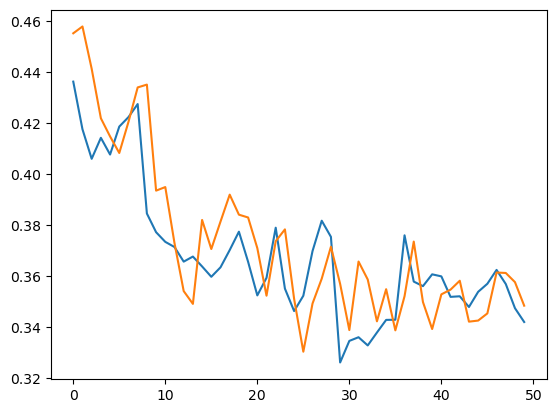

In [183]:
plt.plot(pd.DataFrame(y_test))
plt.plot(pd.DataFrame(model.predict_generator(X_test)))

In [185]:
import tensorflow as tf
tf.keras.models.save_model(model, 'lstm_rnn1')

INFO:tensorflow:Assets written to: lstm_rnn1\assets


INFO:tensorflow:Assets written to: lstm_rnn1\assets


In [23]:
import tensorflow.keras as tf
lstm_rnn1 = tf.models.load_model('lstm_rnn1')

C:\Users\hp\miniconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2030: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


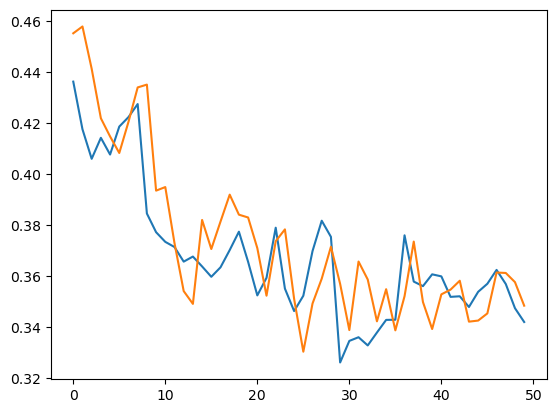

In [24]:
plt.plot(pd.DataFrame(y_test))
plt.plot(pd.DataFrame(lstm_rnn1.predict_generator(X_test)))

In [55]:
from sklearn.metrics import r2_score
r2_score(lstm_rnn1.predict_generator(X_test), y_test)

C:\Users\hp\miniconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2030: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


0.6887313533217183

In [56]:
pred=pd.DataFrame(lstm_rnn1.predict_generator(X_test),columns=['Predicted']).diff()

C:\Users\hp\miniconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2030: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [59]:
pred['Actual']=pd.DataFrame(y_test).diff()

In [74]:
pred_TF=pd.DataFrame({"Predicted":pred['Predicted']>0,"Actual":pred['Actual']>0})

In [75]:
pred_TF['xx']=pred_TF['Predicted']==pred_TF['Actual']

In [82]:
len(pred_TF[pred_TF['xx']==True])

31

In [84]:
len(pred_TF[pred_TF['xx']==False])

19

In [85]:
len(pred_TF[pred_TF['xx']==True]) / (len(pred_TF[pred_TF['xx']==True]) + len(pred_TF[pred_TF['xx']==False]))

0.62

In [58]:
r2_score(pred['Predicted'][1:], pred['Actual'][1:])

-0.4236410677368252

In [22]:
sp500_forecast=yf.download('^GSPC',start="2023-03-02", end="2023-03-05",interval='1h')

[*********************100%***********************]  1 of 1 completed


In [25]:
np.array(sp500_forecast['Adj Close'])

array([3943.87011719, 3941.88989258, 3943.60009766, 3944.91992188,
       3973.79003906, 3978.62988281, 3981.29003906, 4017.16992188,
       4016.30004883, 4025.94995117, 4033.68994141, 4041.33007812,
       4044.04003906, 4045.32006836])

In [ ]:
model = Sequential()
model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32),return_sequences=True, input_shape=(50,1)))
model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=512,step=32)))
model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
model.add(Dense(1, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),metrics = ['mse'])

In [15]:
plot_model(model, show_shapes=True, show_layer_names=True)